<a href="https://colab.research.google.com/github/azkafarsi/Embeddings/blob/main/Tweet_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
from sentence_transformers.quantization import quantize_embeddings

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
# 1. Specify preffered dimensions
dimensions = 512

In [5]:
# 2. load model
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1", truncate_dim=dimensions)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/113k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [6]:
import pandas as pd

In [12]:
docs = pd.read_csv('Dataset__problem_1_.csv')

# Displaying the DataFrame
print(docs)

         index                                               text  sentiment
0            0                                               text          0
1            1  rising cases of covid does not alarm me rising...          1
2            2  please vote for chicagoindiaresolution marking...          0
3            3  wishing all of you eidaladha hazrat ibrahim as...          1
4            4  daily coronavirus cases in india top for first...          1
...        ...                                                ...        ...
134343  134343  happydiwali to india from dgisi and dgispr you...          1
134344  134344  india has been involved in many countries with...          1
134345  134345  does anybody know website which ships pre orde...          0
134346  134346  what hinted few weeks back in an interview wit...          0
134347  134347  this is just slice of what we have pakistan na...          0

[134348 rows x 3 columns]


In [13]:
# Drop rows with missing values in the 'text' column
docs = docs.dropna(subset=['text'])

# Ensure all entries are strings
docs['text'] = docs['text'].astype(str)

In [14]:
# 2. Encode
embeddings = model.encode(docs['text'].tolist())

# Optional: Quantize the embeddings
binary_embeddings = quantize_embeddings(embeddings, precision="ubinary")

similarities = cos_sim(embeddings[0], embeddings[1:])
print('similarities:', similarities)

similarities: tensor([[0.4062, 0.4376, 0.4300,  ..., 0.4130, 0.3620, 0.3715]])


In [15]:
# Calculate similarities
if len(embeddings) > 1:
    similarities = cos_sim(embeddings[0], embeddings[1:])
    print('similarities:', similarities)
else:
    print('Not enough embeddings to calculate similarities.')

similarities: tensor([[0.4062, 0.4376, 0.4300,  ..., 0.4130, 0.3620, 0.3715]])


In [16]:
import numpy as np

# Assuming 'binary_embeddings' is the quantized embeddings and 'docs' contains the sentiment labels
labels = docs['sentiment'].values

# Convert the quantized embeddings to a suitable format (e.g., numpy array)
X = np.array(binary_embeddings)

# Ensure the embeddings and labels have the same length
assert len(X) == len(labels)

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, y_train)


LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the sentiments for the testing set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.6730067743616467
Precision: 0.6833124030435104
Recall: 0.6728251382019202
F1 Score: 0.678028220634048


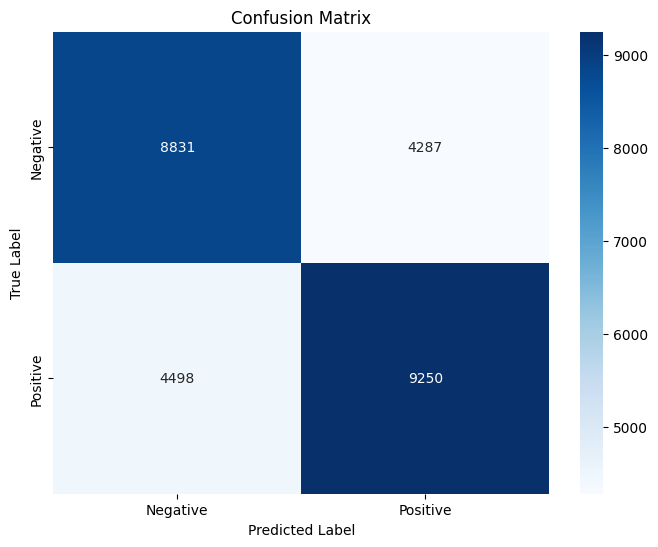

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


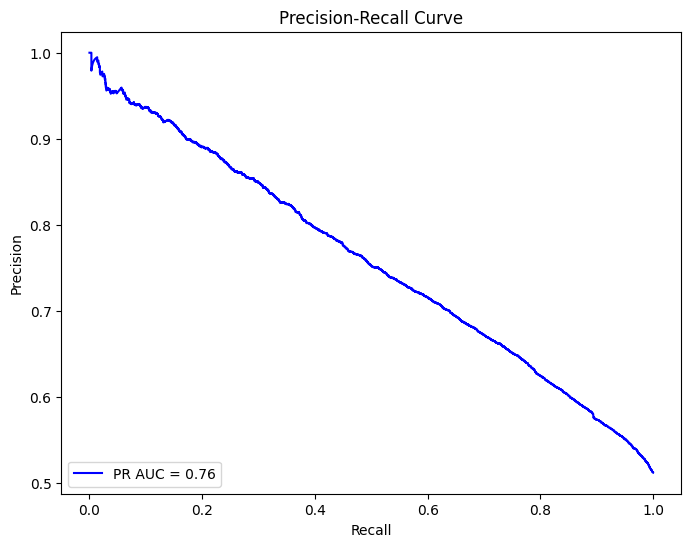

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:, 1])

# Calculate area under curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


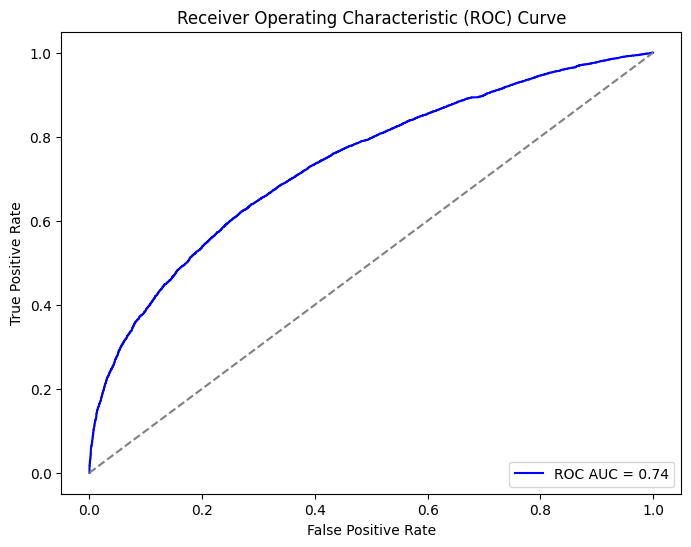

In [24]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])

# Calculate area under curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


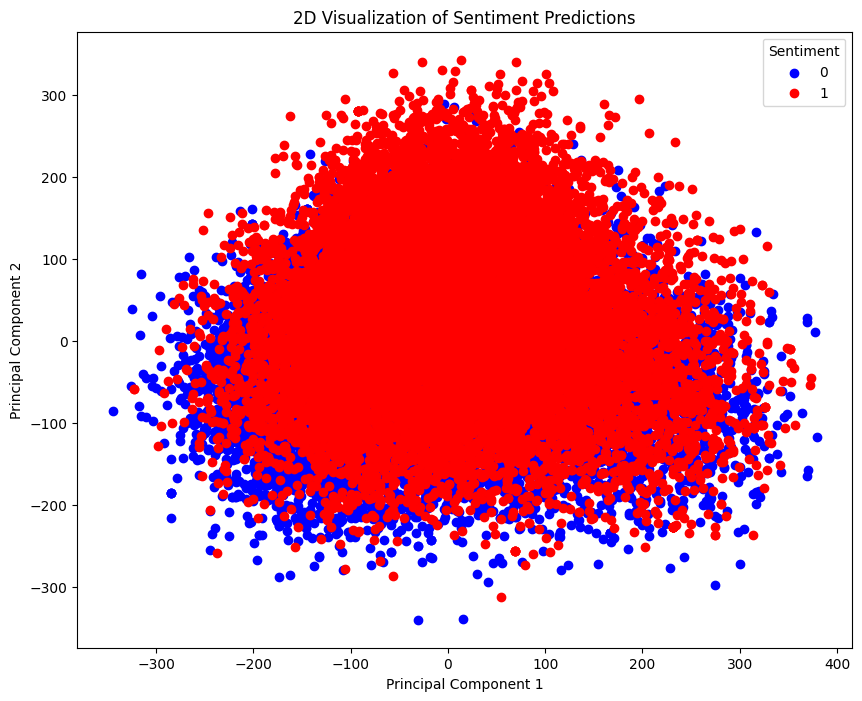

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of embeddings for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(X_test)

# Plot the embeddings, color-coded by predicted sentiment
plt.figure(figsize=(10, 8))
colors = ['blue', 'red']  # Assuming binary sentiment classes
for i, sentiment in enumerate(set(y_test)):
    plt.scatter(embeddings_2d[y_test == sentiment, 0], embeddings_2d[y_test == sentiment, 1], c=colors[i], label=sentiment)

plt.title('2D Visualization of Sentiment Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sentiment')
plt.show()
